### **Import the Relevant Pacakages**

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose



### **Loading and Transforming the data**

In [49]:
import warnings
warnings.filterwarnings('ignore')

In [50]:
raw_csv_data = pd.read_csv("/content/Index2018.csv")
df_comp = raw_csv_data.copy() #copy the data

df_comp['date'] =  pd.to_datetime(df_comp['date'],dayfirst = True)  #To Convert to date time
df_comp.set_index('date',inplace = True)  #set the index to date
df_comp = df_comp.asfreq('b')  #bussiness Days
df_comp = df_comp.fillna(method = 'ffill')


In [51]:
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


In [52]:
# Correctly renaming the column in-place
df_comp.rename(columns={'spx': 'market_value'}, inplace=True)


In [53]:
df_comp.head()

,market_value,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


In [54]:
#Drop the colums expect the market values
df_comp.drop(columns = ['dax','ftse','nikkei'],inplace = True)


In [55]:
df_comp.head()

,market_value
date,
1994-01-07,469.90
1994-01-10,475.27
1994-01-11,474.13
1994-01-12,474.17
1994-01-13,472.47


### **Removing Surplus Data**

In [56]:
df_comp.head()

,market_value
date,
1994-01-07,469.90
1994-01-10,475.27
1994-01-11,474.13
1994-01-12,474.17
1994-01-13,472.47


In [57]:
##Make thse split of 80 - 20
size = int(len(df_comp)*0.8)
df,df_test = df_comp.iloc[:size],df_comp.iloc[size:]

In [58]:
df.tail()

,market_value
date,
2013-04-01,1562.173837
2013-04-02,1570.252238
2013-04-03,1553.686978
2013-04-04,1559.979316
2013-04-05,1553.278930


In [59]:
df_test.head()

,market_value
date,
2013-04-08,1563.071269
2013-04-09,1568.607909
2013-04-10,1587.731827
2013-04-11,1593.369863
2013-04-12,1588.854623


### **White Noise**

- Generate White Noise data and plot its values.

- Plottinf the Graph of the S&P Closing Prices and Compare the two.

In [60]:
un = np.random.normal(loc = df['market_value'].mean(),scale = df['market_value'].std(),size = len(df))

In [61]:
df['wn']  = un

In [62]:
df.describe()

,market_value,wn
count,5021.000000,5021.000000
mean,1091.651926,1094.150086
std,292.559287,297.232575
min,438.920000,-70.303975
25%,914.620000,894.424528
50%,1144.650000,1091.138875
75%,1316.280729,1296.460614
max,1570.252238,2272.628955


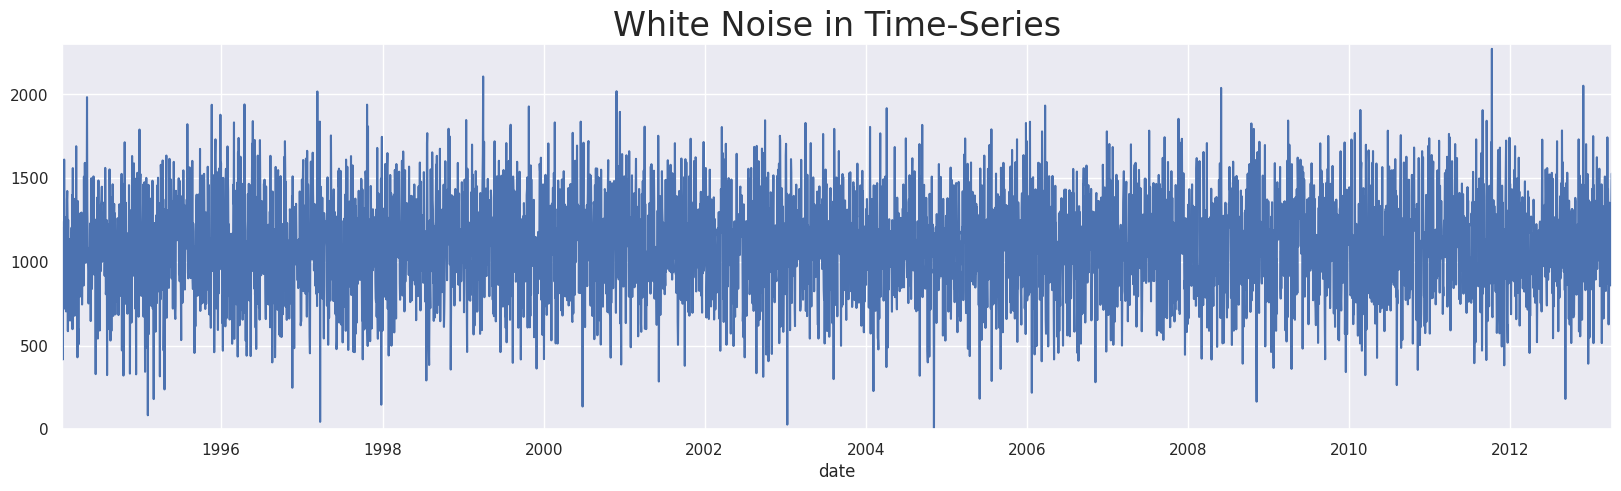

In [63]:
 #Set the figure size
plt.figure(figsize=(20, 5))

# Plot the 'wn' column from the DataFrame 'df'
df['wn'].plot()

# Add title
plt.title('White Noise in Time-Series',size = 24)
plt.ylim(0,2300) #make the linit to 0 - 2300
# Show the plot
plt.show()


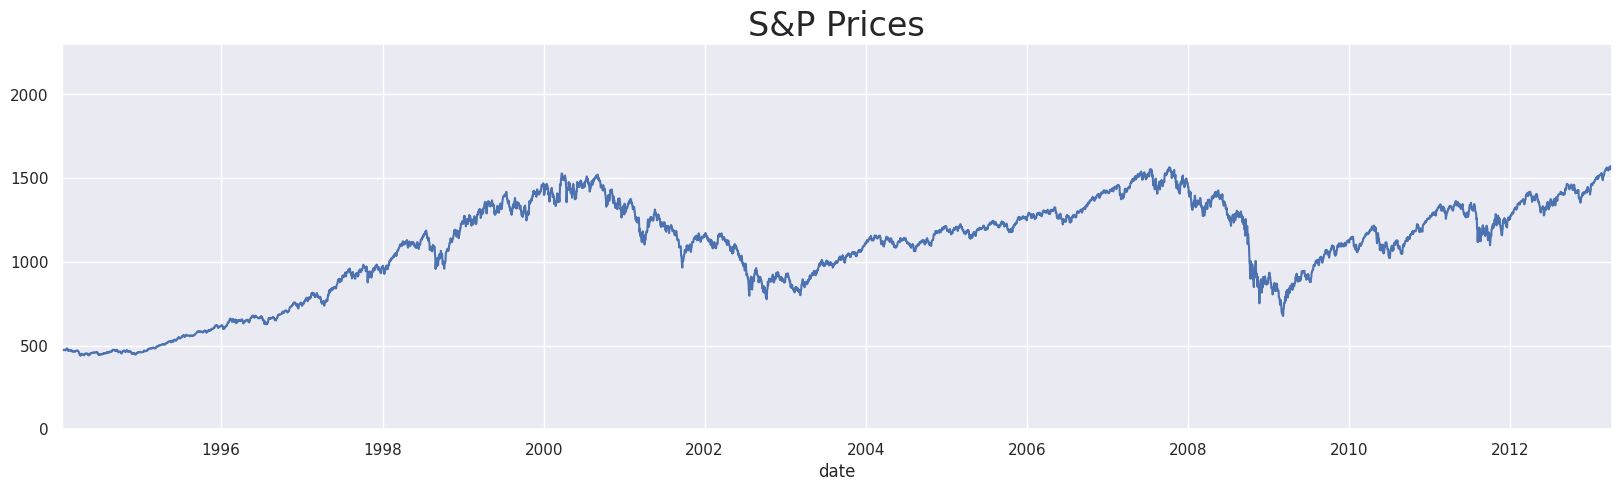

In [64]:
plt.figure(figsize = (20,5))
df['market_value'].plot()
plt.title('S&P Prices',size = 24)
plt.ylim(0,2300) #make the linit to 0 - 2300
plt.show()

#Smaller jumpsy from the S&P values

### **RandomWalk**

In [65]:
rw = pd.read_csv("/content/RandWalk.csv")

In [66]:
rw.head()

,date,price
0,07/01/1994,1122.139662
1,08/01/1994,1135.238562
2,09/01/1994,1109.897831
3,10/01/1994,1080.347860
4,11/01/1994,1082.095245


In [67]:
rw['date']

,date
0,07/01/1994
1,08/01/1994
2,09/01/1994
3,10/01/1994
4,11/01/1994
...,...
7024,01/04/2013
7025,02/04/2013
7026,03/04/2013
7027,04/04/2013


In [68]:
rw['date'] = pd.to_datetime(rw['date'],dayfirst = True)


In [69]:
rw.set_index('date',inplace = True)  #set the index to date
rw = rw.asfreq('b') #take th bussines freq days

In [70]:
rw.describe()

,price
count,5021.000000
mean,1269.944293
std,444.216793
min,585.483034
25%,931.550429
50%,1156.363045
75%,1488.362029
max,2715.508720


In [71]:
df['rw'] = rw['price']  #add the column to the train df

In [72]:
df.head()

,market_value,wn,rw
date,,,
1994-01-07,469.90,1238.309504,1122.139662
1994-01-10,475.27,920.663907,1080.347860
1994-01-11,474.13,1198.869374,1082.095245
1994-01-12,474.17,415.702876,1083.639265
1994-01-13,472.47,1129.813185,1067.146255


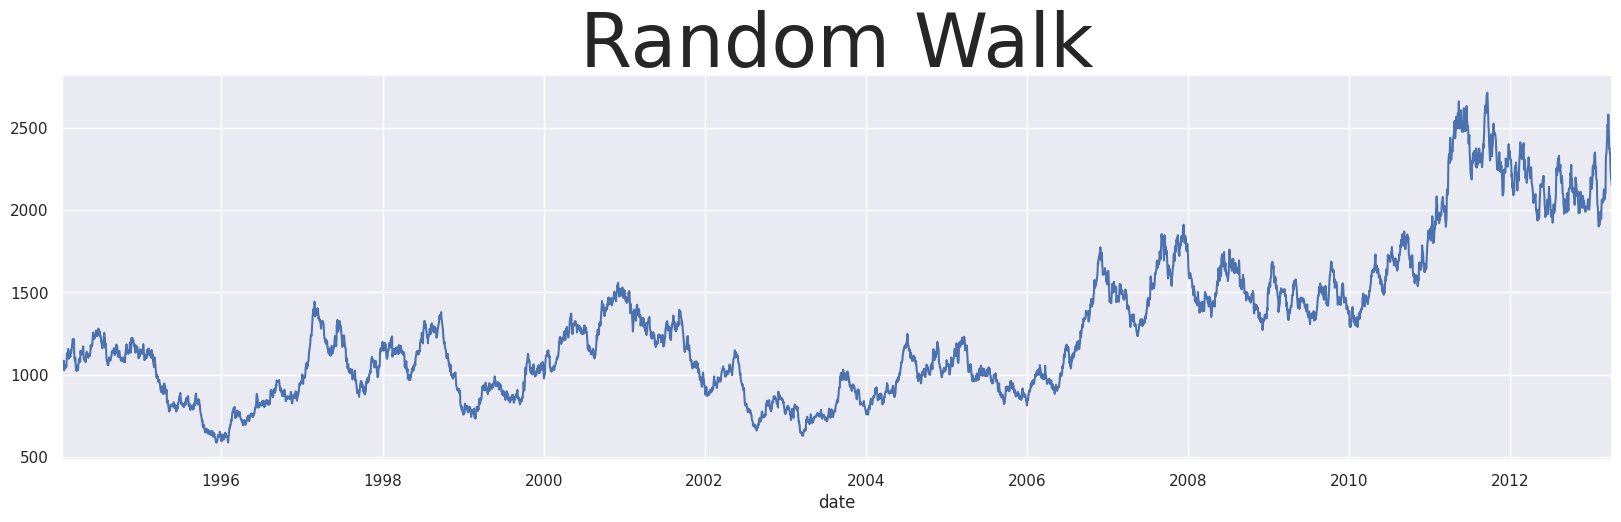

In [74]:
##plt te Random Walk
plt.figure(figsize = (20,5))
df.rw.plot()
plt.title("Random Walk",size = 54)
plt.show()

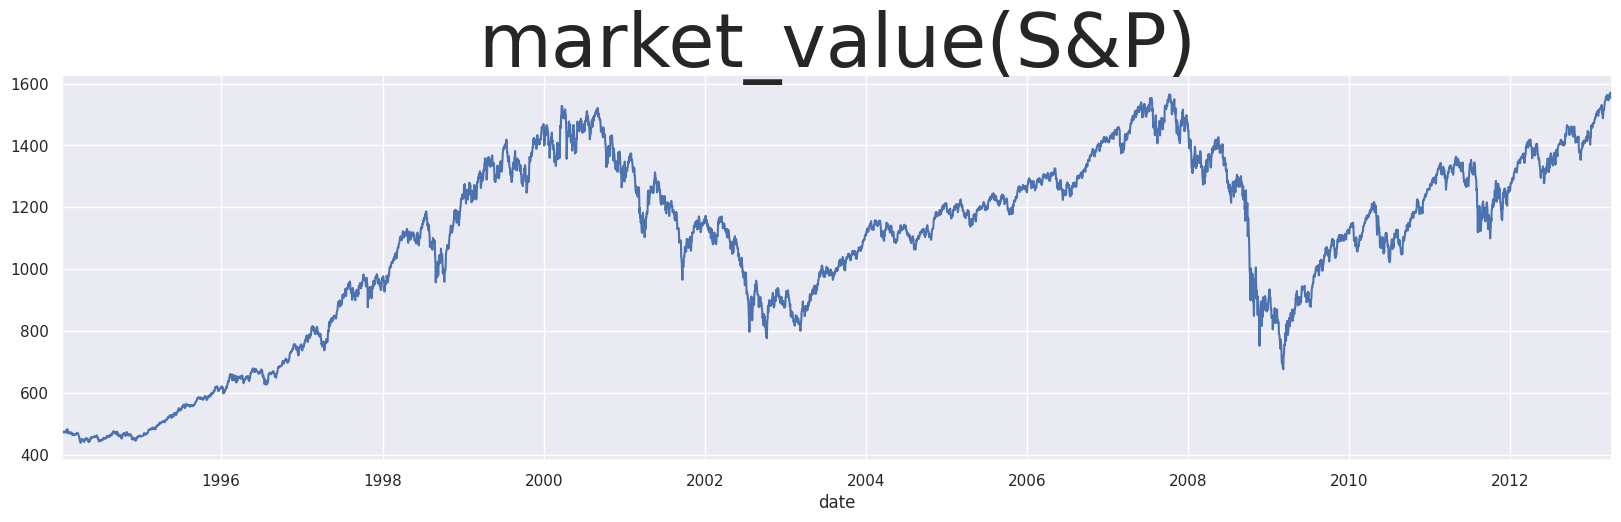

In [75]:
##plt te market_value(S&P)
plt.figure(figsize = (20,5))
df.market_value.plot()
plt.title("market_value(S&P)",size = 54)
plt.show()

- Plot the Both Graphs on the near same

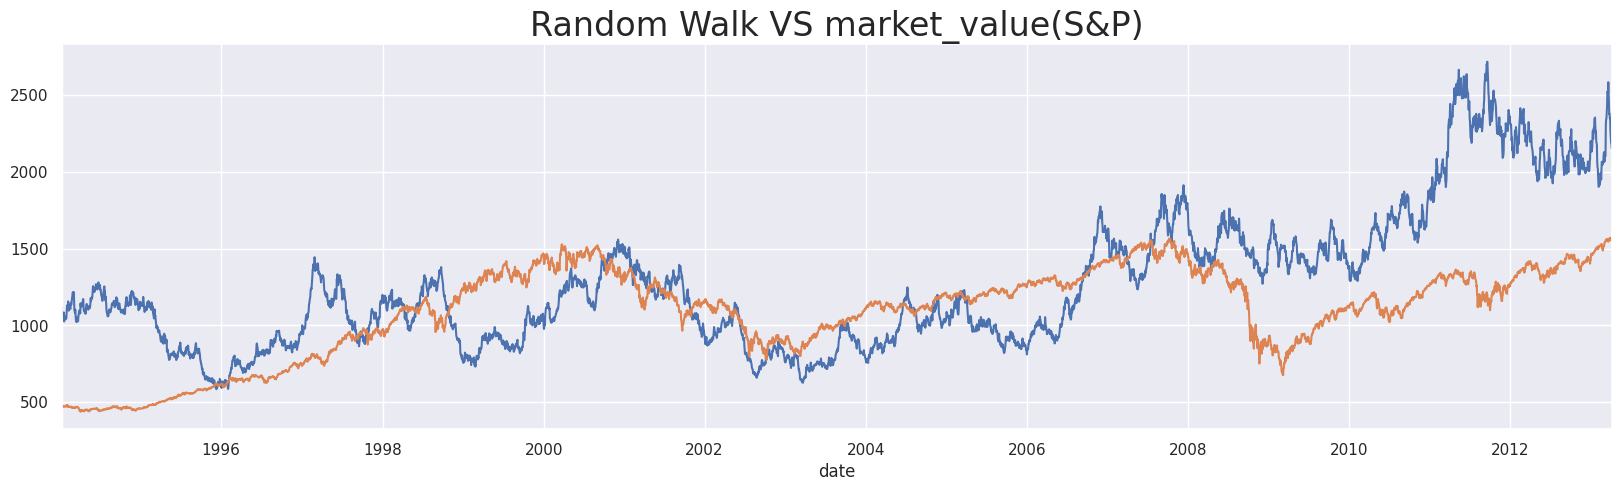

In [77]:
##plt the Random Walk and market_value(S&P)
plt.figure(figsize = (20,5))
df.rw.plot()
df.market_value.plot()
plt.title("Random Walk VS market_value(S&P)",size = 24)
plt.show()

- Small Variation sBetween Conscutive time Perods .

- Cyclic increses and dreceses in short Periods of Time.

### **Stationary**

In [78]:
sts.adfuller(df['market_value'])

(-1.7369847452352456,
 0.4121645696770613,
 18,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 39904.880607487445)

In [81]:
from statsmodels.tsa.stattools import adfuller


result = adfuller(df['market_value'])

# Display the results
adf_statistic = result[0]
p_value = result[1]
used_lag = result[2]
n_observations = result[3]
critical_values = result[4]

print('ADF Statistic:', adf_statistic)
print('p-value:', p_value) #40 % chance not rejecting null
print('Used Lag:', used_lag)
print('Number of Observations:', n_observations)
print('Critical Values:', critical_values)


ADF Statistic: -1.7369847452352456
p-value: 0.4121645696770613
Used Lag: 18
Number of Observations: 5002
Critical Values: {'1%': -3.431658008603046, '5%': -2.862117998412982, '10%': -2.567077669247375}


### **ADF Test Results for market_value**
- ADF Statistic: -1.73698
- p-value: 0.41216
- Used Lag: 18
- Number of Observations: 5002
- Critical Values:
- 1%: -3.43166
- 5%: -2.86212
- 10%: -2.56708

### **Analysis:**

- The ADF statistic is -1.73698, which is not more negative than the critical values at any significance level (1%, 5%, or 10%).


- The p-value is 0.41216, which is much greater than the typical significance levels (e.g., 0.05).

- Conclusion:
   -  We fail to reject the null hypothesis, suggesting that the market_value time series is non-stationary.
   - This indicates that there may be trends or seasonality present in the data.

In [82]:
result_1 = adfuller(df['wn'])
# Display the results
adf_statistic = result_1[0]
p_value = result_1[1]
used_lag = result_1[2]
n_observations = result_1[3]
critical_values = result_1[4]

print('ADF Statistic:', adf_statistic)
print('p-value:', p_value) #here, p -value close to zero
print('Used Lag:', used_lag)
print('Number of Observations:', n_observations)
print('Critical Values:', critical_values)


ADF Statistic: -33.97026566831535
p-value: 0.0
Used Lag: 4
Number of Observations: 5016
Critical Values: {'1%': -3.431654355990492, '5%': -2.862116384706994, '10%': -2.5670768102089263}


### **2. ADF Test Results for wn (White Noise)**
- ADF Statistic: -33.97027
- p-value: 0.0
- Used Lag: 4
- Number of Observations: 5016
- Critical Values:
  1%: -3.43165
  5%: -2.86212
  10%: -2.56708

### **Analysis:**

- The ADF statistic is -33.97027, which is significantly more negative than the critical values.

- The p-value is 0.0, indicating strong
 evidence against the null hypothesis.

- Conclusion:
 - We reject the null hypothesis, suggesting that the wn series is stationary.
 - This makes sense because white noise is typically stationary by definition.


In [83]:
result_1 = adfuller(df['rw'])
# Display the results
adf_statistic = result_1[0]
p_value = result_1[1]
used_lag = result_1[2]
n_observations = result_1[3]
critical_values = result_1[4]

print('ADF Statistic:', adf_statistic)
print('p-value:', p_value) #here, p -value is
print('Used Lag:', used_lag)
print('Number of Observations:', n_observations)
print('Critical Values:', critical_values)


ADF Statistic: -1.3286073927689719
p-value: 0.6159849181617385
Used Lag: 24
Number of Observations: 4996
Critical Values: {'1%': -3.4316595802782865, '5%': -2.8621186927706463, '10%': -2.567078038881065}


### **3. ADF Test Results for rw**
- ADF Statistic: -1.32861
- p-value: 0.61598
- Used Lag: 24
- Number of Observations: 4996
- Critical Values:
 1%: -3.43166
 5%: -2.86212
 10%: -2.56708
- Analysis:

 - The ADF statistic is -1.32861, which is not more negative than the critical values at any significance level.
 - The p-value is 0.61598, which is greater than the typical significance levels (e.g., 0.05).

- Conclusion:
 - We fail to reject the null hypothesis, indicating that the rw series is non-stationary.
 - This suggests that there may also be trends or seasonality in this data.

**p-value: of the df['rw']**

- The p-value is 0.61598, which is much higher than the common significance levels (e.g., 0.05 or 0.01).

- A high p-value indicates that there is insufficient evidence to reject the null hypothesis.

## **Summary of Analysis**

- market_value:
 - Non-stationary.
 - You may need to apply transformations or differencing before modeling.

- wn (White Noise):
 - Stationary.
 - This series is suitable for time series analysis and modeling.

- rw:
 - Non-stationary.
 - Similar to market_value, this series may require transformations to achieve stationarity.

### **Seasonality**

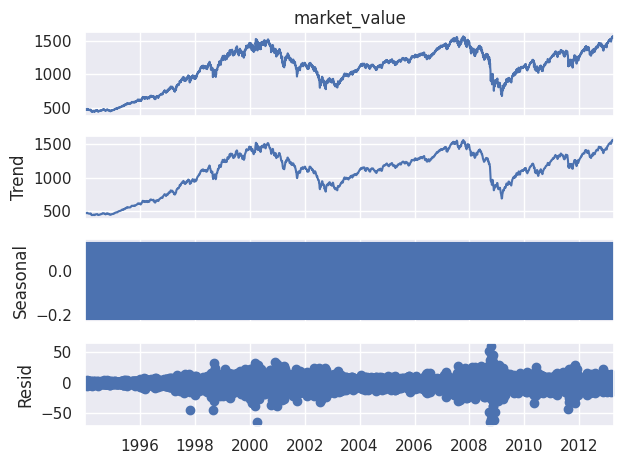

In [87]:
s_dec_additive = seasonal_decompose(df['market_value'],model = "additive")
s_dec_additive.plot()
plt.show()

- Observed is equal to the Trend.

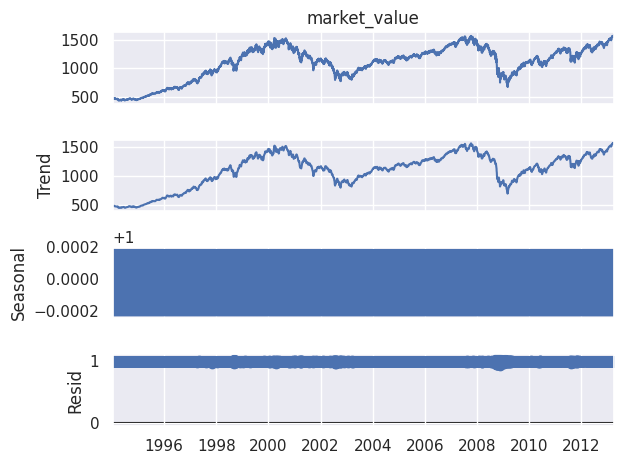

In [88]:
s_dec_multi = seasonal_decompose(df['market_value'],model = "multiplicative")
s_dec_multi.plot()
plt.show()

- the Seasonal has no patterns and also the trend is almost equal to the given(Observed data).

### **ACF(Auto - Correlation Function)**

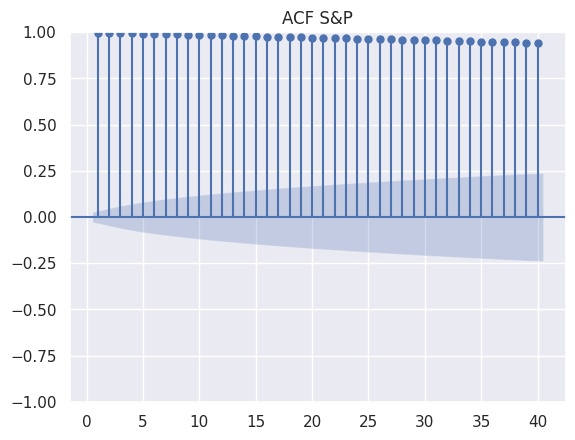

In [96]:
sgt.plot_acf(df['market_value'],lags = 40,zero = False)
plt.title("ACF S&P")
plt.show()  #corlation tkes tha values bewtebb -1 to + 1=>y-aixs
#X-axis= >lags

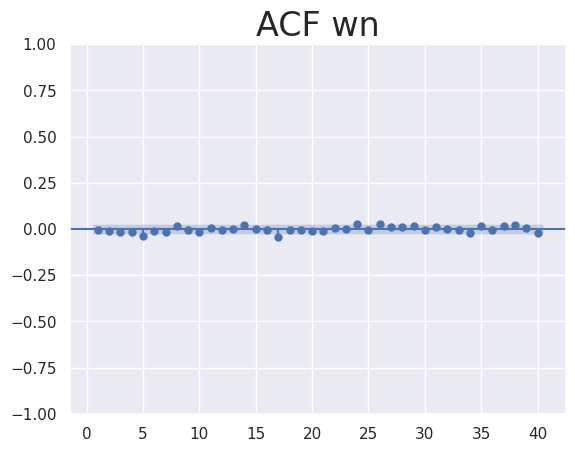

In [100]:
sgt.plot_acf(df.wn,lags = 40,zero = False)
plt.title("ACF wn",size = 24)
plt.show()  #corlation tkes tha values bewtebb -1 to + 1=>y-aixs
#X-axis= >lags

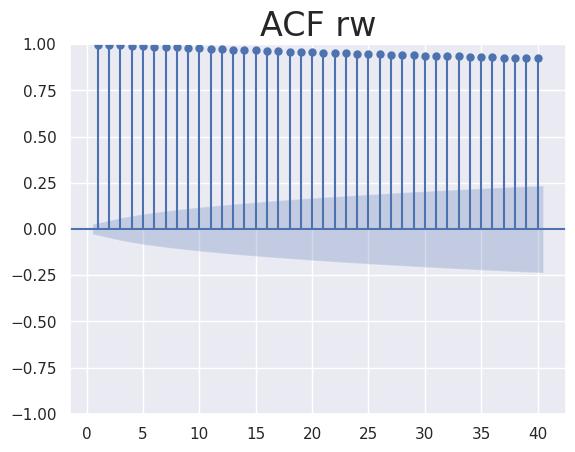

In [101]:
sgt.plot_acf(df.rw,lags = 40,zero = False)
plt.title("ACF rw",size = 24)
plt.show()  #corlation tkes tha values bewtebb -1 to + 1=>y-aixs
#X-axis= >lags

### **PCAF(Partial Auto-Corrlation Function)**

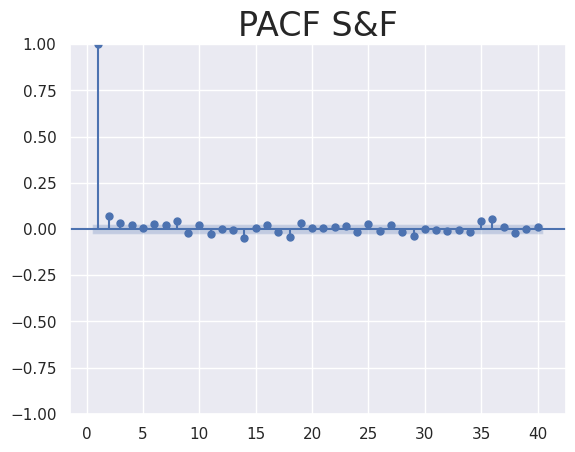

In [105]:
sgt.plot_pacf(df.market_value,lags = 40,zero = False,method = ('ols'))
plt.title("PACF S&F",size = 24)
plt.show()

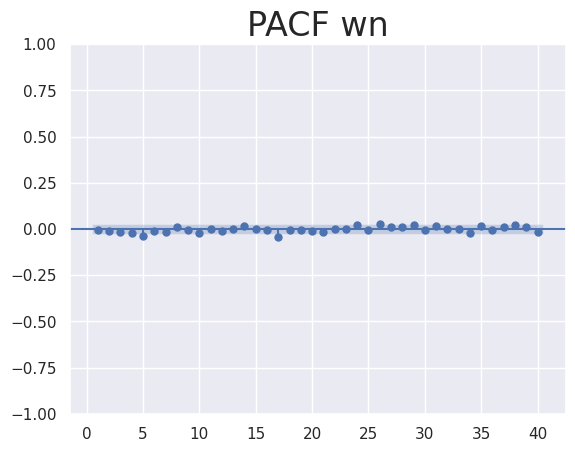

In [106]:
sgt.plot_pacf(df.wn,lags = 40,zero = False)
plt.title("PACF wn",size = 24)
plt.show()  #corlation tkes tha values bewtebb -1 to + 1=>y-aixs
#X-axis= >lags


#No autocorrelation in the white noise

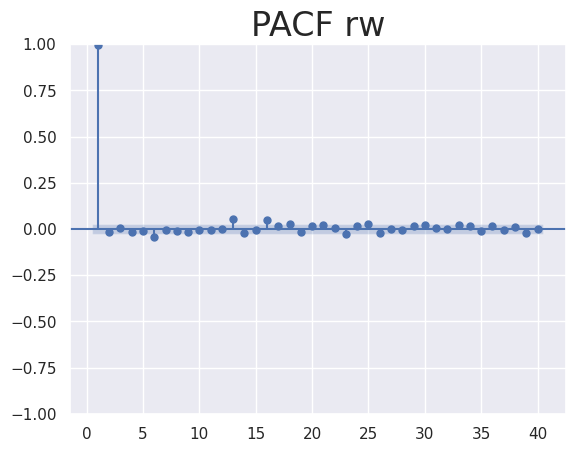

In [107]:
sgt.plot_pacf(df.rw,lags = 40,zero = False)
plt.title("PACF rw",size = 24)
plt.show()  #corlation tkes tha values bewtebb -1 to + 1=>y-aixs
#X-axis= >lags